Tanvir Hossain

Email: Tanvirh3103@gmail.com

In [ ]:
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 import seaborn as sns

 data = pd.read_csv('/content/final-employee-ds.csv')
 data

,EmployeeID,Name,Age,Gender,Department,ExperienceYears,Salary,WorkHoursPerWeek,PerformanceScore,JoinDate,Tshirt_size,ProjectCount,TrainingHours,DepartmentRating
0,101,Employee_1,50,Male,IT,17,86175.0,44,71,2010-01-10,L,2,4,1
1,102,Employee_2,36,Male,Finance,1,47805.0,44,68,2017-11-11,S,4,18,4
2,103,Employee_3,29,Male,Marketing,16,45237.0,44,69,2012-03-08,S,6,13,3
3,104,Employee_4,42,Male,Marketing,12,60056.0,48,76,2012-10-12,M,2,25,4
4,105,Employee_5,40,Female,Finance,19,85543.0,36,97,2014-12-30,XL,8,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,196,Employee_96,58,Female,Marketing,9,67350.0,47,65,2021-06-20,S,9,25,2
96,197,Employee_97,56,Male,IT,12,133008.0,45,77,2011-11-03,XL,5,12,2
97,198,Employee_98,43,Female,Management,1,134297.0,45,64,2015-05-24,M,3,39,3
98,199,Employee_99,48,Male,Marketing,1,65351.0,36,84,2021-05-19,L,5,17,2


Question 01:

In [ ]:
# print(data['TrainingHours'].dtype)
data['TrainingHours'] = data['TrainingHours'].astype(float)
# print(data['TrainingHours'].dtype)

print(data['TrainingHours'].mean())
print(data['TrainingHours'].std())
# print(f"{data['TrainingHours'].std():.2f}")

24.19
13.912203058444556


Question 02:

In [ ]:
# null_rows = data[data['Salary'].isnull()]
# display(null_rows)

# department_median_salary = data.groupby('Department')['Salary'].median()
# print(department_median_salary)

data['Salary'] = data.groupby('Department')['Salary'].transform(lambda x: x.fillna(x.median()))

# null_rows = data[data['Salary'].isnull()]
# display(null_rows)

filtered_employees = data[(data['ExperienceYears'] > 12) & (data['ProjectCount'] > 5)]
total_salary_sum = filtered_employees['Salary'].sum()
print(total_salary_sum)

1985775.5


Question 03:

In [ ]:
filtered_employees = data[
    (data['Department'].isin(['IT', 'Finance'])) &
    (data['Age'] >= 30) & (data['Age'] <= 45) &
    (data['PerformanceScore'] > 88)
]

filtered_employees = filtered_employees.sort_values(by='Salary', ascending=False)
display(filtered_employees)

,EmployeeID,Name,Age,Gender,Department,ExperienceYears,Salary,WorkHoursPerWeek,PerformanceScore,JoinDate,Tshirt_size,ProjectCount,TrainingHours,DepartmentRating
94,195,Employee_95,45,Female,IT,5,140386.0,41,94,2011-10-29,XL,8,11.0,3
88,189,Employee_89,30,Female,Finance,13,126027.0,41,92,2018-01-26,M,2,7.0,1
4,105,Employee_5,40,Female,Finance,19,85543.0,36,97,2014-12-30,XL,8,3.0,4
32,133,Employee_33,39,Male,IT,1,83919.0,41,98,2015-09-13,L,5,2.0,1
55,156,Employee_56,31,Female,Finance,7,49540.0,35,94,2015-10-24,M,1,9.0,1


Question 04:

In [ ]:
data['SalaryPerHour'] = data['Salary'] / (data['WorkHoursPerWeek'] * 4)
# data['SalaryPerHour']
filtered_employees = data.sort_values(by='SalaryPerHour', ascending=False).head(5)
display(filtered_employees[['Name', 'SalaryPerHour']])

,Name,SalaryPerHour
46,Employee_47,981.278571
27,Employee_28,971.292857
31,Employee_32,967.392857
79,Employee_80,945.335526
80,Employee_81,937.858974


Question 05:

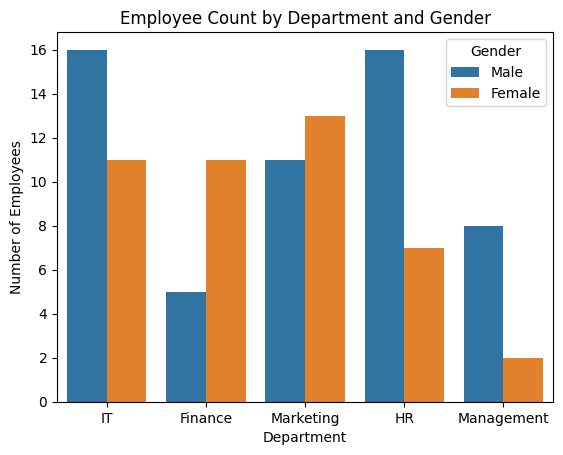

In [ ]:
sns.countplot(data=data, x='Department', hue='Gender')
plt.title('Employee Count by Department and Gender')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.legend(title='Gender')
plt.show()